#**HYPOTHYROIDISM PREDICTION AND CLASSIFICATION MODEL**


**a) Data Analytic Question**

Which features are most important in diagnosing and predicting  predicting thyroid gland disease .

**b) Success Metrics**

* Sucessful Exploratory Data Analysis.
* Sucessful feature engineering.
* Sucessful check of multicollinearity.
* Sucessful generation of Decision Trees.
* Sucessful application of Polynomial, linear and rbf kernel function to build their SVM model.
* Sucessful optimization of model parameters.
* Sucessful Computation of accuracy score on all models.
* Sucessful selection of the prefered model.

**c) context**

The advancements of computer technologies have generated an incredible amount of data and information from numerous sources. Nowadays, the way of implementing health care are being changing by utilizing the benefits of advancements in compute technologies. It is believed that engineering this amount of data can assist in developing predictive tool that can help physicians to diagnosing and predicting some debilitating life-threatening illness such as thyroid gland disease.

The aim of this project is to make use of Decision tree algorithm to predict the diagnosis of thyroid gland disease (hyperthyroidism or hypothyroidism or a normal condition) using CRT decision tree algorithm. Such model can minify the cost,waiting time, and as well decrease the errors and mistakes that can be made by humans on account of exhaustion and tiredness.The project will require the analyst to perform;
* Feature transformation and dimensionality reduction techniques so as to increase the quality of the feature space. 
* Compare multiple reggression and choose the one that performs best. 

**d) Experimental Design**

* Formulation of the research question.
* Loading the data.
* Exploratory Data Analysis.
* feature engineering.
* Multicollinearity check.
* Decision Trees generation.
* Creation  of Support Vector Machine models and plots.
* Challenging the solution.
* Follow up .

In [133]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

#Helper Functions

In [121]:
def convert_category(dataframe, column):
    
    if column == 'sex':
        conditionF = dataframe[column] == 'F' 
        conditionT = dataframe[column] == 'M' 
    elif column != 'sex':
        conditionF = dataframe[column] == 'y' 
        conditionT = dataframe[column] == 'n'
    else:
        conditionF = dataframe[column] == 'f'
        conditionT = dataframe[column] == 't'
    
    dataframe.loc[conditionF, column] = 0
    dataframe.loc[conditionT, column] = 1

#load the data

In [122]:
hypothyroid_data = pd.read_csv('hypothyroid.csv')


#Data header

In [123]:
hypothyroid_data.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?


#Data description


In [125]:
hypothyroid_data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


#Data Cleaning

# standardizing the column names

In [126]:
hypothyroid_data.columns = hypothyroid_data.columns.str.replace('/', '').str.strip().str.lower()  

hypothyroid_data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

*Binarize Categorical Columns*

In [127]:
binary_cols = ['status', 'sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid','query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 
               'goitre','tsh_measured','t3_measured', 'tt4_measured', 't4u_measured', 'fti_measured', 'fti', 'tbg_measured']

for col in binary_cols: convert_category(hypothyroid_data, col)



Delete rows which have '?'  on the age and gender

In [128]:
hypothyroid_data = hypothyroid_data[hypothyroid_data['age']!='?']
hypothyroid_data = hypothyroid_data[hypothyroid_data['sex']!='?']

*Convert '?' to np.nan and convert numeric data to numeric dtype*

In [129]:
for col in hypothyroid_data.columns: 
    if col != 'Category':
       hypothyroid_data.loc[hypothyroid_data[col] == '?', col] = np.nan
       hypothyroid_data= hypothyroid_data.fillna(0)
hypothyroid_data.sample(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
1831,negative,55,0.0,f,f,f,f,f,t,f,f,f,f,f,0.0,4.10,0.0,2,0.0,78,0.0,0.79,0.0,99,1.0,0
2174,negative,65,0.0,f,f,f,f,f,f,f,f,f,f,f,0.0,1,0.0,2.10,0.0,115,0.0,0.94,0.0,122,1.0,0
1465,negative,65,0.0,f,f,f,f,f,f,f,f,f,f,f,0.0,0,0.0,1.70,0.0,143,0.0,1.03,0.0,138,1.0,0


#**Exploratory Data Analysis**

checcking out numerical and categorical variables

In [130]:
numerical = hypothyroid_data._get_numeric_data().columns
categorical = set(hypothyroid_data.columns) - set(numerical)
numerical 

Index(['sex', 'tsh_measured', 't3_measured', 'tt4_measured', 't4u_measured',
       'fti_measured', 'tbg_measured'],
      dtype='object')

Outliers detection in numerical columns

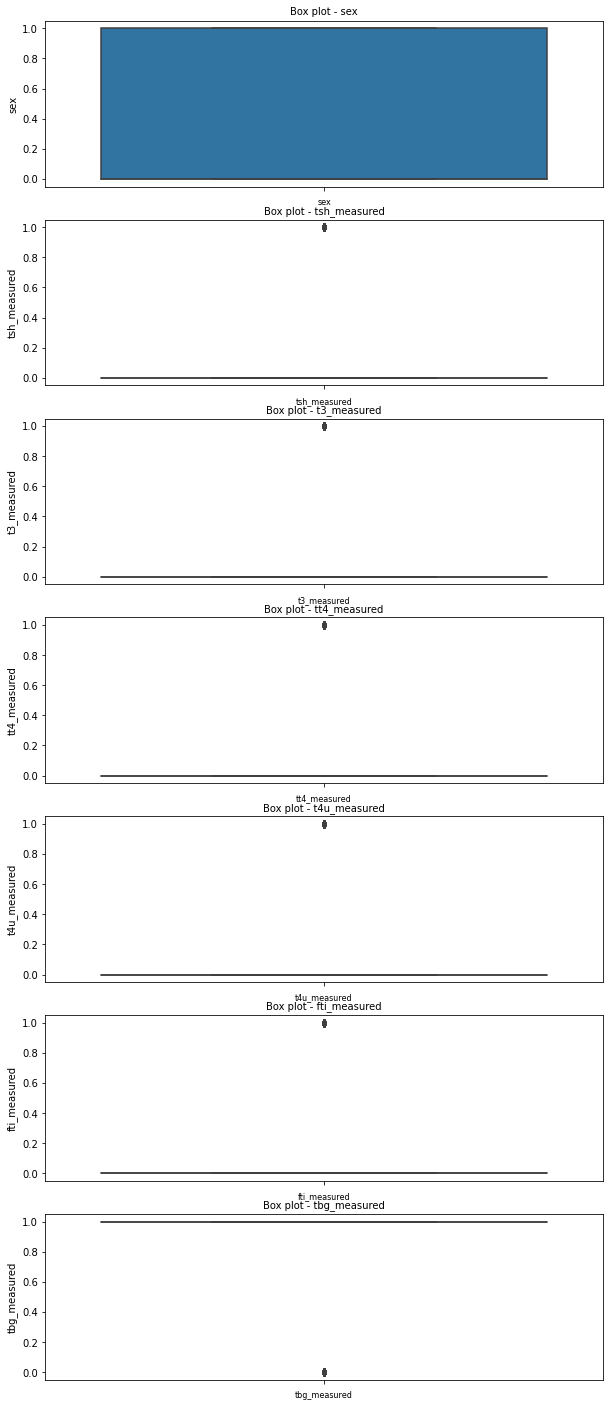

In [138]:
col_names= numerical

fig, ax = plt.subplots(len(col_names), figsize=(10,25))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=hypothyroid_data[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Percentile Outlier Visualization

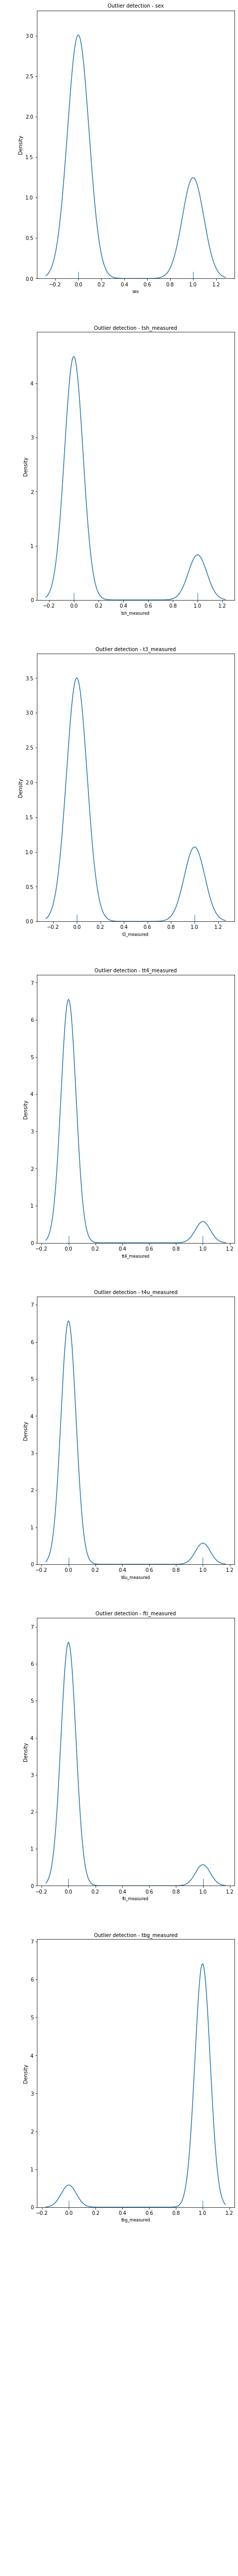

In [139]:
#Values marked with a red dot below in the x-axis of the graph are the ones to be removed
#from the column based on the set threshold percentile (95 in our case), and
#is also the default value when it comes to percentile-based outlier removal.

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names= numerical

fig, ax = plt.subplots(len(col_names), figsize=(7,80))

for i, col_val in enumerate(col_names):
    x = hypothyroid_data[col_val]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Removing the outliers

In [141]:
numerical = hypothyroid_data._get_numeric_data().columns
categorical = set(hypothyroid_data.columns) - set(numerical)
numerical 

lsUpper = []
lsLower = []
def removeOutliers(numerical):
    for i in range(len(numerical)):
        q1 = hypothyroid_data[numerical[i]].quantile(0.25)
        q3 = hypothyroid_data[numerical[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR
        hypothyroid_data.loc[(hypothyroid_data[numerical[i]] <= minimum), numerical[i]] = minimum
        hypothyroid_data.loc[(hypothyroid_data[numerical[i]] >= maximum), numerical[i]] = maximum  
removeOutliers(numerical)

#**Univariate analysis**

Freq dist by status

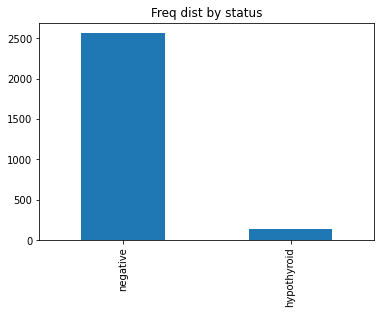

In [144]:
hypothyroid_data['status'].value_counts().plot.bar(title='Freq dist by status')

BIVARIATE ANALYSIS
Crosstab Visualizations

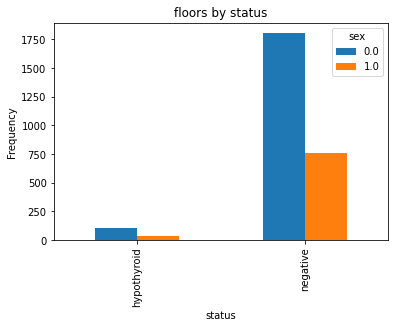

In [146]:
pd.crosstab(hypothyroid_data.status,hypothyroid_data.sex).plot(kind='bar')
plt.title('floors by status')
plt.xlabel('status')
plt.ylabel('Frequency')
plt.show()

#**Classification of Thyroid via Decission tress and Support Vector Machines**

In [89]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer

df_col=['on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre']

for i in range(len(df_col)):
    hypothyroid_data[df_col[i]] = LabelEncoder().fit_transform(hypothyroid_data[df_col[i]])

hypothyroid_data.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,30,0.0,0.60,0.0,15,0.0,1.48,0.0,10,1.0,0
1,hypothyroid,15,0.0,1,0,0,0,0,0,0,0,0,0,0,0.0,145,0.0,1.70,0.0,19,0.0,1.13,0.0,17,1.0,0


#Split Data

In [90]:
X = hypothyroid_data.drop('status', axis=1)
y = hypothyroid_data['status']

col_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

#Visualize Data with PCA

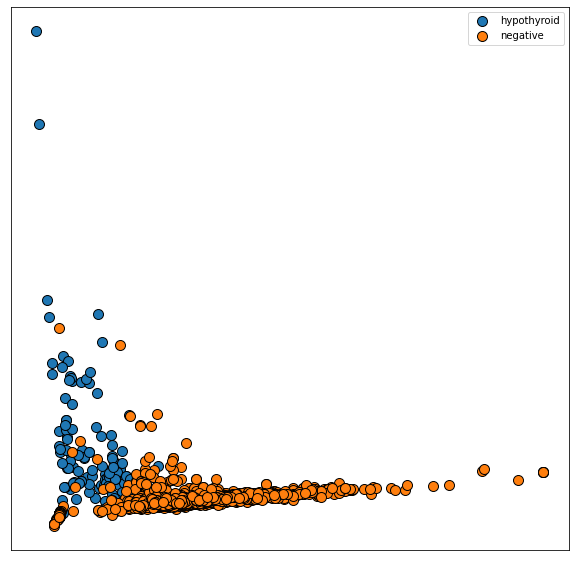

In [91]:
def plot_pca_data(X, y):    
    
    LE = LabelEncoder()
    y_encoded = LE.fit_transform(y)
    
    pca = PCA(n_components=2)
    pca.fit(X)
    pca_X = pca.transform(X)

    x_axis = pca_X[:,0]
    y_axis = pca_X[:,1]

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    for label in np.unique(y):
        ax.scatter(pca_X[y==label, 0],
                   pca_X[y==label, 1], 
                   label=label,
                   s=100,
                   edgecolor='k')
        

    ax.legend()
    plt.xticks([])
    plt.yticks([])

plot_pca_data(X, y)

# ***Part 1: Decision trees:***

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables

y = hypothyroid_data['status']

test_features = ['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery',	'query_hypothyroid','tt4',
                 'query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','tsh_measured',	'tsh','t3_measured','t3','tt4_measured',
                 't4u_measured','t4u','fti_measured','fti','tbg_measured',	'tbg']
# We have used all the other features.
X = hypothyroid_data[test_features].values

# Train using 75% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#Creat a model and assess its accuracy.

In [93]:
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?

print('\n',"*"*75)
print("Computed Model Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,'%')
print('\n',"*"*75)


 ***************************************************************************
Computed Model Accuracy: 98.22222222222223 %

 ***************************************************************************


#Visualize the model through export_graphviz

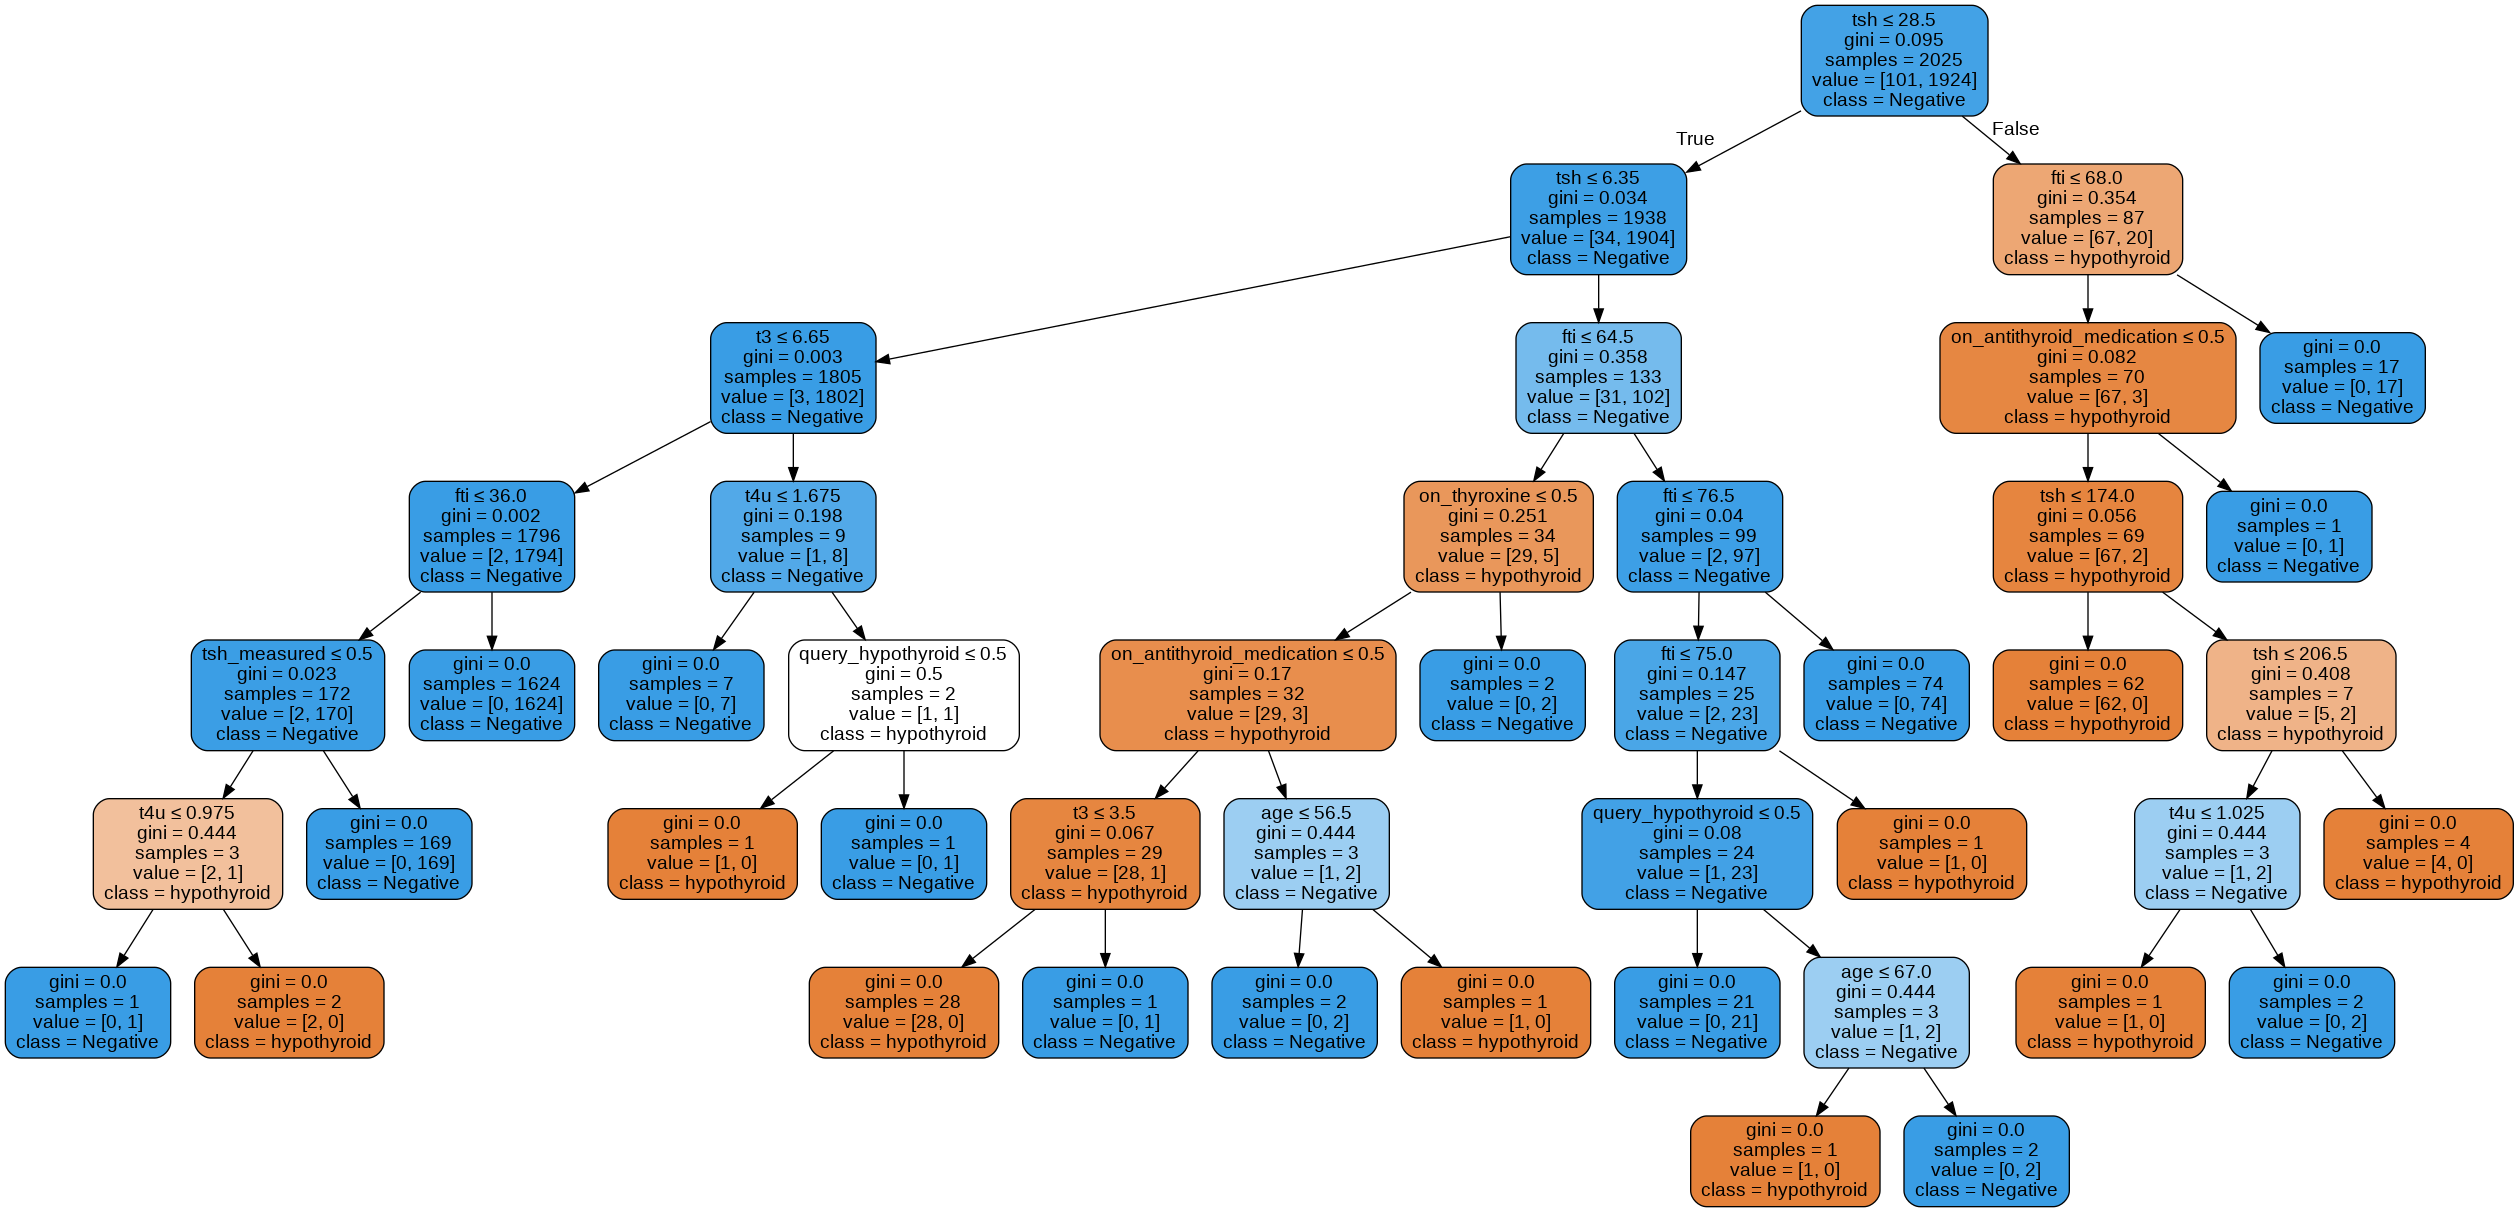

In [94]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['hypothyroid', 'Negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

To get a better sense of the inner workings of our decision tree, we have visualized it:

1.   The first parameter is our model
2.   The feature_names parameter are all the names our independent variables
1.   class_names is a list of the various categories we are classifying.
2.   There are as many entries as there are categories for dependent variables - In this case we have two values: positve, and negatives. Whit matching class names to each: 'hypothyroid', 'Negative'.


#Graph interpretation  starting from the **root node**

The first classification performed is based on age. The datasets are split based on age above 6 .

NOte:

* Each node has a gini value which are important when performing ptimization.



# **Optimizing Decision Trees - Random Forests**

In [95]:
df_col=['status']

for i in range(len(df_col)):
    hypothyroid_data[df_col[i]] = LabelEncoder().fit_transform(hypothyroid_data[df_col[i]])
    hypothyroid_data2=hypothyroid_data
hypothyroid_data2.sample(1)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
420,1,59,1.0,0,0,1,0,0,0,0,0,0,0,0,0.0,0,0.0,4.90,0.0,116,0.0,0.94,0.0,123,1.0,0


In [96]:
# Import the RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
 
# Split the independent and dependent variables

y_RF = hypothyroid_data2['status']

test_features_RF = ['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery',	'query_hypothyroid','tt4',
                 'query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','tsh_measured',	'tsh','t3_measured','t3','tt4_measured',
                 't4u_measured','t4u','fti_measured','fti','tbg_measured',	'tbg']
# We have used all the other features.
X_RF = hypothyroid_data2[test_features].values

# Train using 75% of the data.
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X_RF, y_RF, test_size=0.25, random_state=0)

# The random_state variable is to guarantee  the same values.
# One set the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train_RF, y_train_RF)

# Predict based on the model we've trained
y_pred_RF = forest.predict(X_test_RF)


comparison_frame_RF = pd.DataFrame({'Actual': y_test_RF, 'Predicted': y_pred_RF})

comparison_frame_RF.describe()

,Actual,Predicted
count,675.000000,675.000000
mean,0.948148,0.948129
std,0.221892,0.208040
min,0.000000,0.001543
25%,1.000000,0.999887
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


#Assessment of the random forest 

In [97]:
from sklearn import metrics

# And now we assess the errors
print('\n',"*"*75)
print('\n','Mean Absolute Error:', metrics.mean_absolute_error(y_test_RF, y_pred_RF))  
print('\n','Mean Squared Error:', metrics.mean_squared_error(y_test_RF, y_pred_RF))  
print('\n','Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_RF, y_pred_RF)))

print('\n',"*"*75)


 ***************************************************************************

 Mean Absolute Error: 0.01636382459753041

 Mean Squared Error: 0.010399894638885557

 Root Mean Squared Error: 0.1019798736951834

 ***************************************************************************


#Visualize a 50 Random Forest Tree

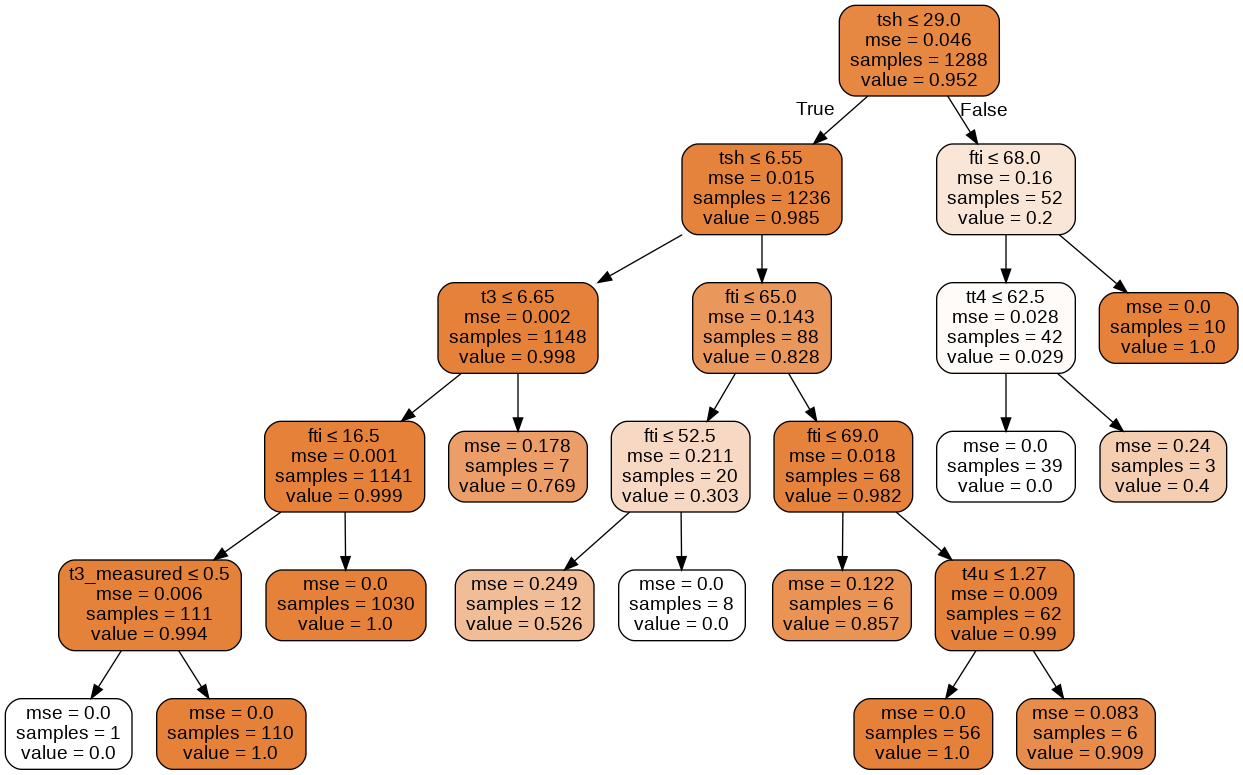

In [98]:
#Visualize a 50 random forest tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features_RF)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

#**Optimizing Decision Trees** - Bagging and Boosting

Bagging and boosting are two techniques that can be used to improve the accuracy of Classification & Regression Trees

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn import datasets # import inbuild datasets

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix



# Decision Tree
Initialize the score as it will help us check whether the model is overfitting. A standard process to implement any classifier model is calling the classifier function, fitting the classifier on training data and target data, and finally predicting outcomes on X_test.

In [100]:
score=[]
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [101]:
print('\n',"*"*75)
print("Training Test Score :",classifier.score(X_train, y_train))
print('\n',"*"*75)
print("Computed Model Accuracy:",classifier.score(X_test, y_test)*100,'%')
print('\n',"*"*75)


 ***************************************************************************
Training Test Score : 1.0

 ***************************************************************************
Computed Model Accuracy: 98.07407407407408 %

 ***************************************************************************


The accuracy score seems good, but a test score of 1.0  shows that the model is overfitting!



#A. Bagging: Random Forest

In [102]:
rf = RandomForestClassifier(n_estimators=100)

bag_clf = BaggingClassifier(base_estimator=rf, n_estimators=100,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [103]:
print('\n',"*"*75)
print("Training Test Score :",bag_clf.score(X_train,y_train))
print('\n',"*"*75)
print("Computed Model Accuracy:",bag_clf.score(X_test,y_test)*100,'%')
print('\n',"*"*75)


 ***************************************************************************
Training Test Score : 0.9980246913580247

 ***************************************************************************
Computed Model Accuracy: 98.81481481481481 %

 ***************************************************************************


The accuracy is around 98.81%, and the model has solved the problem of overfitting.

#B. Boosting: Gradient Boosting

Sci-kit learn's gradient boosting defaults to the decision tree only. Hence, it is also known as Gradient Boosting Decision Tree

In [104]:
gb = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [105]:
print('\n',"*"*75)
print("Training Test Score :",gb.score (X_train,y_train))
print('\n',"*"*75)
print("Computed Model Accuracy:",gb.score (X_test,y_test)*100,'%')
print('\n',"*"*75)


 ***************************************************************************
Training Test Score : 1.0

 ***************************************************************************
Computed Model Accuracy: 98.96296296296296 %

 ***************************************************************************


It is overfitting! Same as the decision tree. 

#C. Boosting: AdaBoost


In [106]:
ad = AdaBoostClassifier(n_estimators=100, learning_rate=0.03)

ad.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.03,
                   n_estimators=100, random_state=None)

In [107]:
print('\n',"*"*75)
print("Training Test Score :",ad.score(X_train, y_train))
print('\n',"*"*75)
print("Computed Model Accuracy:",ad.score(X_test, y_test)*100,'%')
print('\n',"*"*75)


 ***************************************************************************
Training Test Score : 0.9930864197530864

 ***************************************************************************
Computed Model Accuracy: 98.96296296296296 %

 ***************************************************************************


The model doesn't overfit, and it has the accuracy score of all the other models.

#Model Selection


#We select for AdaBoost Classifier as our best fit.

In [108]:
y_pred=ad.predict(X_test)
print('\n',"*"*75)
print(classification_report(y_test,y_pred))
print('\n',"*"*75)
print('confusion_matrix:','\n',confusion_matrix(y_test,y_pred))
print('\n',"*"*75)


 ***************************************************************************
              precision    recall  f1-score   support

 hypothyroid       0.91      0.89      0.90        35
    negative       0.99      1.00      0.99       640

    accuracy                           0.99       675
   macro avg       0.95      0.94      0.95       675
weighted avg       0.99      0.99      0.99       675


 ***************************************************************************
confusion_matrix: 
 [[ 31   4]
 [  3 637]]

 ***************************************************************************


#Compute Feature Importances

To determine which features are most impactful in influencing the prediction

In [109]:
tree=DecisionTreeClassifier()
tree=tree.fit(X_train, y_train)

# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(test_features, importances)]

print(feature_importances*100) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0069), ('sex', 0.0), ('on_thyroxine', 0.0202), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.021), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0082), ('tt4', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0069), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('tsh_measured', 0.0), ('tsh', 0.5738), ('t3_measured', 0.0), ('t3', 0.0251), ('tt4_measured', 0.0), ('t4u_measured', 0.0), ('t4u', 0.0137), ('fti_measured', 0.0), ('fti', 0.3241), ('tbg_measured', 0.0), ('tbg', 0.0), ('age', 0.0069), ('sex', 0.0), ('on_thyroxine', 0.0202), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.021), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0082), ('tt4', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0069), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('tsh_measured', 0.0), ('tsh', 0.5738), ('t3_measured', 0.0), ('t3', 0.0251), ('tt4_measured', 0.0), ('t4u_measured', 0.0), ('t4u', 0.0137), ('fti_measured',

The below listed were the features of most importance;
* Variable: tsh                  Importance: 0.5738
* Variable: fti                  Importance: 0.3241
* Variable: t3                   Importance: 0.0251
* Variable: on_antithyroid_medication Importance: 0.021
* Variable: on_thyroxine         Importance: 0.0202
* Variable: query_hypothyroid    Importance: 0.0137
* Variable: age                  Importance: 0.0082
* Variable: sick                 Importance: 0.0069
* Variable: t4u                  Importance: 0.0069

#Next we graph the Feature Impotance:

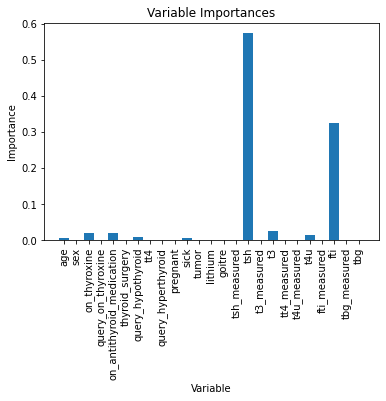

In [110]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#**Part 2:Support Vector Machine SVM**

SVM is a supervised learning algorithm mostly used for classification but it can be used also for regression. The main idea is that based on the labeled data (training data) the algorithm tries to find the optimal hyperplane which can be used to classify new data points.

#**Multiclass Classification with Support Vector Machines (SVM) via diffrent Kernel Functions**

#Import the necessary packages and libaries

In [50]:

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np

#Load the data but select only the most preferable features 

In [111]:
y_svm= hypothyroid_data2['status']

preferable_features =['age','sex','on_thyroxine','on_antithyroid_medication','query_hypothyroid', 'tsh','t3','t4u','fti']
# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(hypothyroid_data2[preferable_features])
X_svm = pca.transform(hypothyroid_data2[preferable_features])
X_svm.shape

(2700, 2)

# Split the independent and dependent variable

In [53]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_svm, y_svm, train_size=0.75, random_state = 0)


#Next we set all parameters to default.
In this step, we set parameters for all the different kernel functions. The penalty term **C** is set to **1** for all **classifiers**. For the multiclass classification, the type **one-versus-one** is specified, as can be seen in decision_function_shape=’ovo’. For the polynomial function, the **degree** of **3** is selected, this is not necessary for other kernel functions.

In [54]:
from sklearn import svm
import matplotlib.pyplot as plt
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train2, y_train2)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train2, y_train2)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train2, y_train2)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train2, y_train2)

Now let's specify the mesh, in which we will plot the results.

In [55]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .01
#create the mesh
x_min, x_max = X_svm[:, 0].min() - 1, X_svm[:, 0].max() + 1
y_min, y_max = X_svm[:, 1].min() - 1, X_svm[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

Next we use loop to plot all  the 4 kernel functions:

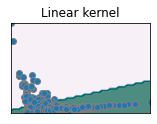

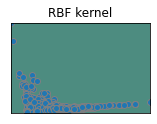

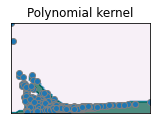

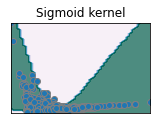

In [59]:
for i, clf in enumerate([linear,rbf,poly,sig]):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    # Plot also the training points
    plt.scatter(X_svm[:, 0], X_svm[:, 1], cmap=plt.cm.PuBuGn,edgecolors='grey')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

Next we make predictions on the test data set using our 4 different kernel functions:

In [63]:
linear_pred = linear.predict(X_test2)
poly_pred = poly.predict(X_test2)
rbf_pred = rbf.predict(X_test2)
sig_pred = sig.predict(X_test2)

To understand how well they perform, we utilize a performance measure — accuracy.

In [70]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test2, y_test2)
accuracy_poly = poly.score(X_test2, y_test2)
accuracy_rbf = rbf.score(X_test2, y_test2)
accuracy_sig = sig.score(X_test2, y_test2)

print('\n',"*"*75)
print('\n',"Accuracy Linear Kernel:", accuracy_lin*100,'%')
print('\n',"Accuracy Polynomial Kernel:", accuracy_poly*100,'%')
print('\n',"Accuracy Radial Basis Kernel:", accuracy_rbf*100,'%')
print('\n',"Accuracy Sigmoid Kernel:", accuracy_sig*100,'%')
print('\n',"*"*75)


 ***************************************************************************

 Accuracy Linear Kernel: 97.03703703703704 %

 Accuracy Polynomial Kernel: 98.22222222222223 %

 Accuracy Radial Basis Kernel: 95.55555555555556 %

 Accuracy Sigmoid Kernel: 93.18518518518518 %

 ***************************************************************************


As the accuracy reveals, some kernel functions are more useful than others, depending on the data. And obviously, more data is also helpful for improving the results.

Next we print the confusion matrices for the 4 kernel functions to understand how and what has been predicted:

In [71]:
# creating a confusion matrix
cm_lin = confusion_matrix(y_test2, linear_pred)
cm_poly = confusion_matrix(y_test2, poly_pred)
cm_rbf = confusion_matrix(y_test2, rbf_pred)
cm_sig = confusion_matrix(y_test2, sig_pred)
print(cm_lin)
print(cm_poly)
print(cm_rbf)
print(cm_sig)

[[ 20  15]
 [  5 635]]
[[ 25  10]
 [  2 638]]
[[  5  30]
 [  0 640]]
[[  0  35]
 [ 11 629]]


#**Optimization: Parameter tuning**

For non-linear kernel, we use the gamma parameter to improve the perfomance.A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. Try playing around with the value of gamma and notice what happens

In [115]:
y_opt= hypothyroid_data2['status']

preferable_features =['age','sex','on_thyroxine','on_antithyroid_medication','query_hypothyroid', 'tsh','t3','t4u','fti']
x_opt=hypothyroid_data2[preferable_features]

from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3= train_test_split(x_opt, y_opt, train_size=0.75, random_state = 0)

In [118]:
def search_for_parameters(estimator, X_data, y_data, grid_parameters, scoring='accuracy', cv=3):
    
    classes = y_data.unique()
    
    # Execute Grid Search
    grid_clf = GridSearchCV(estimator=estimator, scoring=scoring,
                            param_grid=grid_parameters, iid=False,
                            cv=cv,n_jobs=-1)
    
    grid_clf.fit(X_data, y_data)

    print("The best parameters are: ", grid_clf.best_params_)

    return grid_clf.best_params_

In [ ]:
svm_clf = SVC(class_weight='balanced')

svm_params_list = {'C':[1,2,4,8], 
                   'kernel':['poly', 'rbf', 'sigmoid'], 
                   'degree':[3,4,5], 
                   'gamma':['auto','scale']}

svm_parameters = search_for_parameters(estimator=svm_clf, 
                                X_data=X_train3, 
                                y_data=y_train3, cv=5,
                                grid_parameters=svm_params_list)

svm_clf.set_params(**svm_parameters)

svm_clf.fit(X_train, y_train)

#Evaluating of the Optimized Parameters.

In [ ]:
def cross_validate(estimator, X_data, y_data, scoring='accuracy', cv=3, Z=2):
    
    classes = y_data.unique()
    
    # Execute Cross Validation
    scores = cross_val_score(estimator=estimator, X=X_svm, y=y_svm, cv=cv, scoring=scoring)
    print("*"*75)

    print('\n',"Model Scoring Evaluation Results")
    print('\n',"The mean score and the confidence interval of the score estimate are:")

    print('\n',"Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * Z))
    print('\n',"*"*75)

cross_validate(estimator=svm_clf, X_data=X_train3, y_data=y_train3, cv=5)

***************************************************************************

 Model Scoring Evaluation Results

 The mean score and the confidence interval of the score estimate are:

 Accuracy: 0.97 (+/- 0.02)

 ***************************************************************************


#OPtimized Prediction on Test Set

In [ ]:
y_true, y_pred = y_test3, svm_clf.predict(X_test2)

print('\n',"Accuracy:",accuracy_score(y_test3, y_pred)*100,'%')
print('\n','\n',"*"*75)
print()
print("\t\t\tClassification Report")
print()
print(classification_report(y_true, y_pred))


 Accuracy: 97.48148148148148 %

 
 ***************************************************************************

			Classification Report

              precision    recall  f1-score   support

 hypothyroid       0.75      0.77      0.76        35
    negative       0.99      0.99      0.99       640

    accuracy                           0.97       675
   macro avg       0.87      0.88      0.87       675
weighted avg       0.98      0.97      0.97       675



#Conclusion

Of the four kernels in this study the Polynomial Kernel has the highest accuracy at  98.22 %.

#Challenge the solution.

The models performance can be improved through other advanced machine learning techniques.

#Follow up questions.

Do we need more predictor variables to carry out the task?

* Probally yes because theremight be other factors influencethe outcome.

Did the study adopt the correct regression technique?

* Open for further research.